In [ ]:
!pip install wordcloud

In [48]:
import matplotlib.pylab as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import *
import pandas as pd
import platform
from collections import Counter
from matplotlib import font_manager, rc
from konlpy.tag import Twitter; t = Twitter()
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
import colorsys
import random
import platform
import pandas as pd

C:\Users\hwnau\.conda\envs\cuda\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [54]:
df = pd.read_csv("naver_news_dataset.csv")
df

,title,contents,category
0,내일 낮 투표소 갈 땐 가볍게 입으세요…아침에는 쌀쌀,서울·경기·강원 영서 오전 미세먼지 나쁨 제21대 국회의원 선거일이자 수요일인 15...,환경
1,사전투표소 설치,제21대 국회의원 선거 사전투표를 하루 앞둔 9일 오후 부산 연제구청 2층 대강당에...,지역
2,불출마 두 의원이 함께한 여행서 터놓은 속마음,12일 밤 11시 5분 방송되는 SBS스페셜에서는 제21대 총선 불출마 선언으로 국...,언론
3,장애 오빠 돌보러 온 여동생까지…50대 남매 아파트서 화재로 숨져,아파트에서 불이 나 장애가 있는 50대 남성과 돌보러 온 여동생이 함께 숨지는 사고...,사건사고
4,함께 술마시던 지인 흉기로 살해 50대 구속…법원 도주 우려,함께 술을 마시던 지인을 흉기로 찔러 살해해 긴급체포됐던 50대 남성이 구속됐다. ...,사건사고
...,...,...,...
3495,영남대 대학기업가센터 지원사업 성과평가 2년 연속 ‘최우수대학’,영남대가 최근 대학기업가센터 지원사업 성과평가에서 최우수대학에 선정됐다.대학기업가센...,교육
3496,대구·경북 파견 누적 의료인력 3561명,대구·경북 파견 누적 의료인력 3561명. 의사 1621명 간호인력 1486명 임상...,사건사고
3497,MBC 검언유착 녹취록 일부 제출…대검 추가로 내라,본격 진상조사 앞두고 신경전…채널A 자체조사 마치는대로 제출 채널A와 검사장 간 유...,언론
3498,고용허가제 외국인 노동자 체류기간 50일 일괄 연장,고용허가제 적용을 받는 외국인 노동자의 국내 취업활동기간이 50일 일괄 연장된다. ...,노동


In [50]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
    
def make_cloud(category, png_name=0,state="no", background_color_n='white', max_font_size_n = 40):
        
    df1= (df[df["category"]==category])

    text = list(df1["contents"])
    text = ' '.join(text)
    
    ko_con_text = text
    print(len(text))
    #print(text)
    tokens_ko = t.nouns(ko_con_text)
    print("ok")
    stop_words = ['직','제','저', '이','그','때','및','것이','합니다.','\\n',':','','거','수','그' ,"합","이","있는","있습니다.","것","및","하지만","때문에"]
    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

    text = ' '.join(tokens_ko)
    #text
    #f = open(category+".txt", 'w')
    #f.write(text)
    #f.close()

    ko = nltk.Text(tokens_ko, name= category)
    
    if platform.system() == 'Darwin': 
        font_url = "/Library/Fonts/AppleGothic.ttf"
        rc('font', family='AppleGothic')
        #Mac pc의 경우
    elif platform.system() == 'Windows': 
        font_url = 'C:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=font_url).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Linux': 
        font_url = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
        font_name = font_manager.FontProperties(fname=font_url).get_name()
        rc('font', family=font_name)

    %matplotlib inline

    data = ko.vocab().most_common(500)
    tmp_data = dict(data)

    if(png_name):
        korea = np.array(Image.open("img/"+png_name))
    else:
        korea = np.array(Image.open("img/"+category+"1.png"))
    
    image_colors = ImageColorGenerator(korea)
    
    
    wordcloud = WordCloud(font_path=font_url,
                         relative_scaling = 0.2, mask=korea,
                         background_color=background_color_n,
                          min_font_size=1, max_font_size=max_font_size_n
                         ).generate_from_frequencies(tmp_data)
    plt.figure(figsize=(30,30))
    
    #설정에 맞게 색깔 변경
    if state == "no":
        plt.imshow(wordcloud)
    elif state == "img":
        plt.imshow(wordcloud.recolor(color_func=image_colors) ,interpolation='bilinear')
    elif state == "grey":
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3) ,interpolation='bilinear')
    else:
        plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: state, random_state=3) ,interpolation='bilinear')
    
    plt.axis("off")
    plt.show()

In [51]:
set(df["category"])

{'교육', '노동', '사건사고', '식품/의료', '언론', '지역', '환경'}

318579
ok


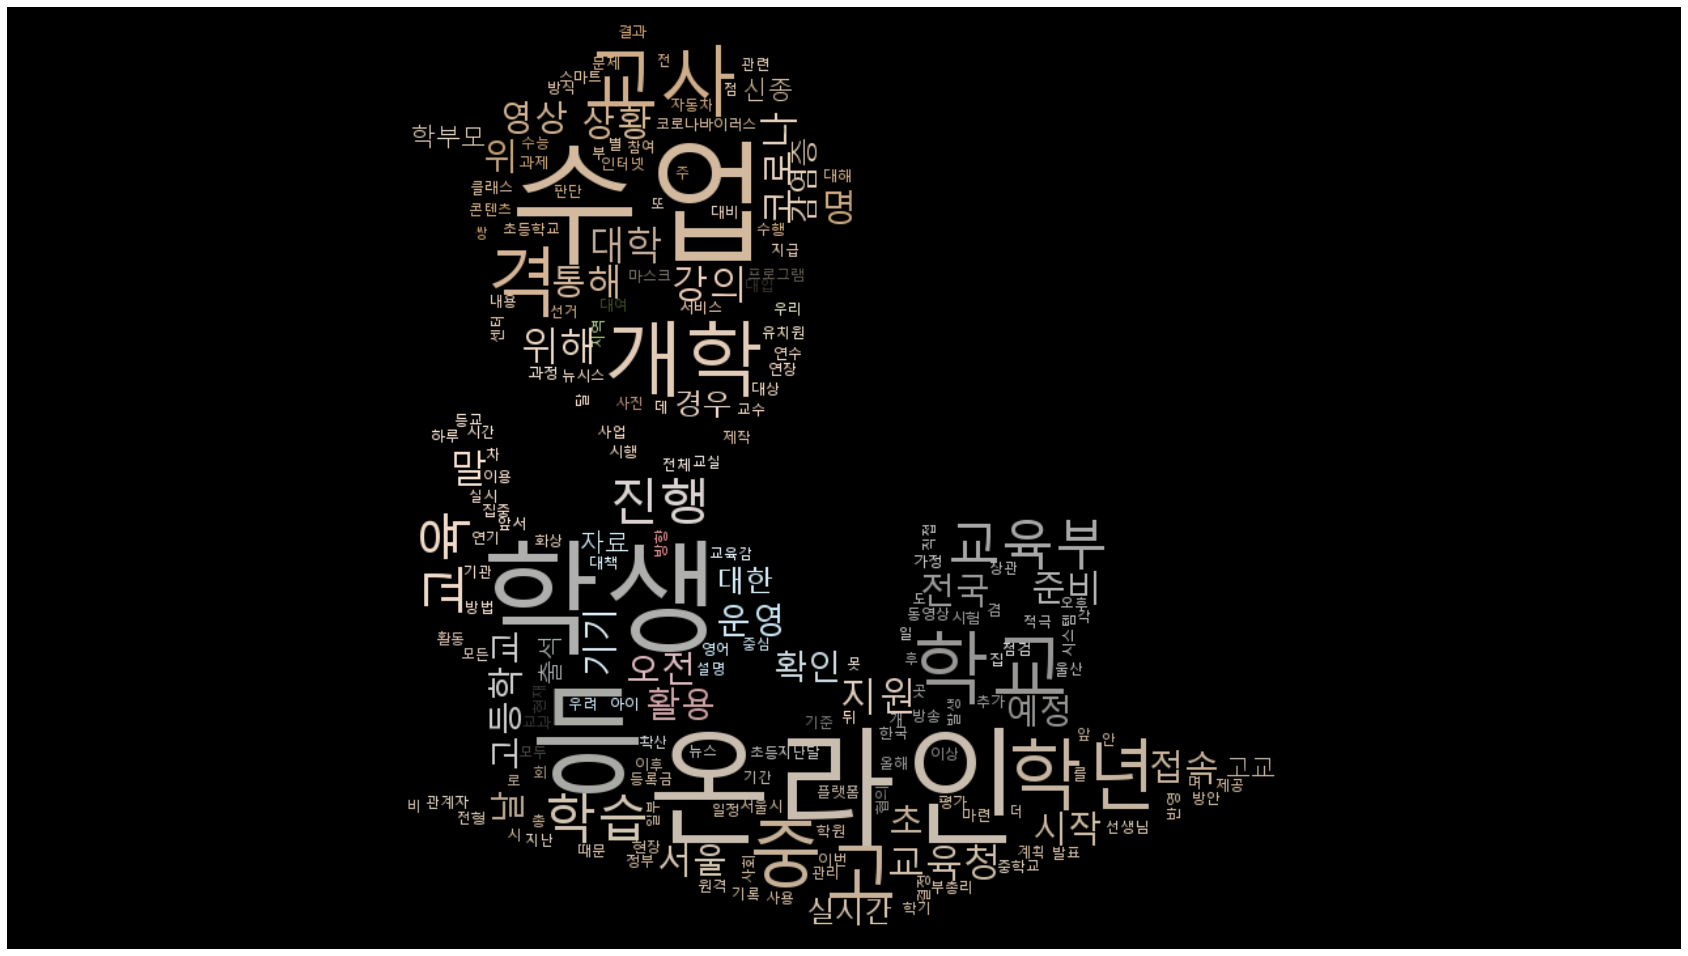

In [52]:
make_cloud("교육", "일자리.png",state="img", background_color_n='black', max_font_size_n = 100)

https://pixabay.com/ko/illustrations/%EB%82%A8%EC%9E%90-%EC%84%B1%EC%9D%B8-%EC%82%AC%EC%97%85%EA%B0%80-%EB%85%B8%ED%8A%B8%EB%B6%81-1459246/

In [57]:
df

,title,contents,category
0,내일 낮 투표소 갈 땐 가볍게 입으세요…아침에는 쌀쌀,서울·경기·강원 영서 오전 미세먼지 나쁨 제21대 국회의원 선거일이자 수요일인 15...,환경
1,사전투표소 설치,제21대 국회의원 선거 사전투표를 하루 앞둔 9일 오후 부산 연제구청 2층 대강당에...,지역
2,불출마 두 의원이 함께한 여행서 터놓은 속마음,12일 밤 11시 5분 방송되는 SBS스페셜에서는 제21대 총선 불출마 선언으로 국...,언론
3,장애 오빠 돌보러 온 여동생까지…50대 남매 아파트서 화재로 숨져,아파트에서 불이 나 장애가 있는 50대 남성과 돌보러 온 여동생이 함께 숨지는 사고...,사건사고
4,함께 술마시던 지인 흉기로 살해 50대 구속…법원 도주 우려,함께 술을 마시던 지인을 흉기로 찔러 살해해 긴급체포됐던 50대 남성이 구속됐다. ...,사건사고
...,...,...,...
3495,영남대 대학기업가센터 지원사업 성과평가 2년 연속 ‘최우수대학’,영남대가 최근 대학기업가센터 지원사업 성과평가에서 최우수대학에 선정됐다.대학기업가센...,교육
3496,대구·경북 파견 누적 의료인력 3561명,대구·경북 파견 누적 의료인력 3561명. 의사 1621명 간호인력 1486명 임상...,사건사고
3497,MBC 검언유착 녹취록 일부 제출…대검 추가로 내라,본격 진상조사 앞두고 신경전…채널A 자체조사 마치는대로 제출 채널A와 검사장 간 유...,언론
3498,고용허가제 외국인 노동자 체류기간 50일 일괄 연장,고용허가제 적용을 받는 외국인 노동자의 국내 취업활동기간이 50일 일괄 연장된다. ...,노동


In [58]:
category = "교육"

df1= (df[df["category"]==category])

text = list(df1["contents"])
text = ' '.join(text)

ko_con_text = text
print(len(text))
#print(text)
tokens_ko = t.nouns(ko_con_text)
print("ok")
stop_words = ['직','제','저', '이','그','때','및','것이','합니다.','\\n',':','','거','수','그' ,"합","이","있는","있습니다.","것","및","하지만","때문에"]
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name= category+' 청원')

data = ko.vocab().most_common(500)
tmp_data = dict(data)

tmp_data

318579
ok


{'수업': 1483,
 '온라인': 1182,
 '학생': 978,
 '등': 823,
 '개학': 753,
 '학교': 640,
 '교사': 587,
 '학년': 557,
 '격': 502,
 '중': 486,
 '고': 451,
 '교육부': 428,
 '교육': 427,
 '학습': 383,
 '진행': 345,
 '교육청': 344,
 '말': 330,
 '지원': 319,
 '대학': 315,
 '코로나': 299,
 '강의': 296,
 '위해': 284,
 '명': 256,
 '영상': 229,
 '서울': 219,
 '오전': 209,
 '활용': 209,
 '고등학교': 205,
 '접속': 201,
 '날': 200,
 '전국': 194,
 '상황': 193,
 '통해': 186,
 '시작': 183,
 '초': 181,
 '준비': 180,
 '운영': 175,
 '기기': 173,
 '위': 172,
 '확인': 169,
 '예정': 167,
 '실시간': 164,
 '대한': 162,
 '경우': 160,
 '감염증': 157,
 '학부모': 157,
 '고교': 154,
 '자료': 154,
 '신종': 153,
 '출석': 146,
 '코로나바이러스': 145,
 '등교': 145,
 '시험': 141,
 '문제': 139,
 '계획': 139,
 '확산': 135,
 '개': 134,
 '스마트': 134,
 '평가': 132,
 '관련': 131,
 '방향': 129,
 '참여': 127,
 '오후': 126,
 '지난': 126,
 '발표': 125,
 '제공': 125,
 '교수': 125,
 '이번': 123,
 '중학교': 121,
 '대상': 121,
 '사용': 121,
 '시간': 120,
 '연기': 119,
 '도': 117,
 '더': 117,
 '콘텐츠': 116,
 '실시': 113,
 '화상': 113,
 '한국': 111,
 '관계자': 110,
 '전': 110,
 '초등학교': 109,
 '현장': 

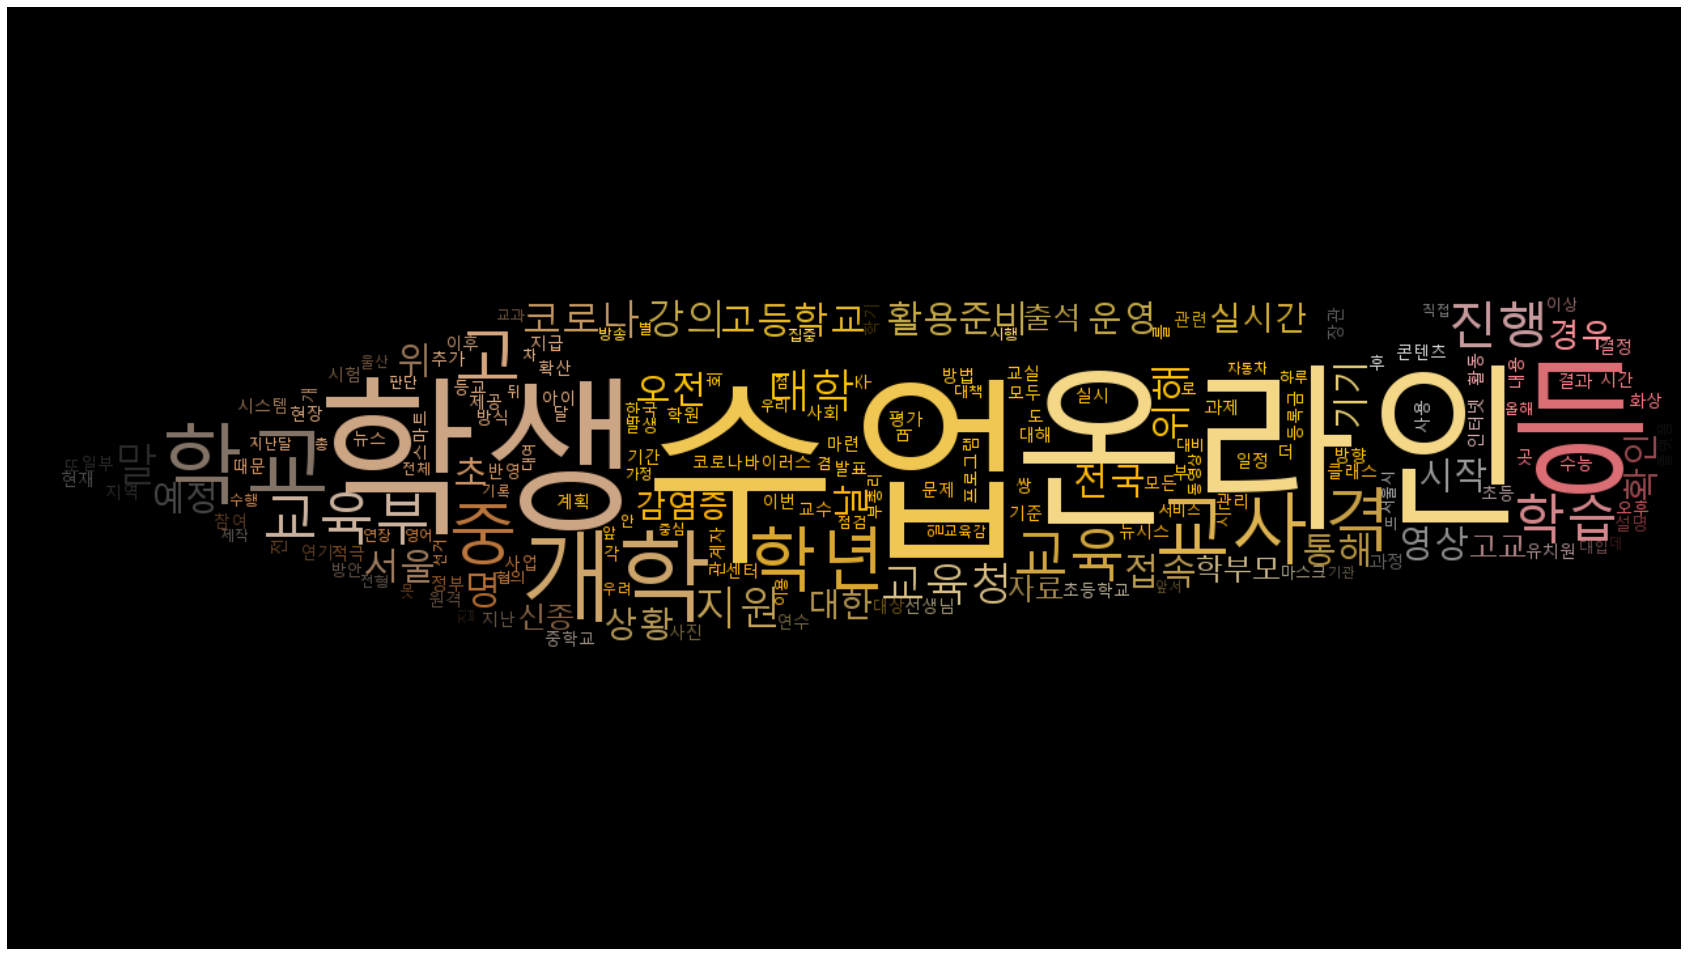

In [65]:
png_name = "교육.png"
background_color_n = "black"
max_font_size_n = 150
state = "img"

# 한글 폰트로 바꾸기
if platform.system() == 'Darwin': 
    font_url = "/Library/Fonts/AppleGothic.ttf"
    rc('font', family='AppleGothic')
    #Mac pc의 경우
elif platform.system() == 'Windows': 
    font_url = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=font_url).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux': 
    font_url = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
    font_name = font_manager.FontProperties(fname=font_url).get_name()
    rc('font', family=font_name)

%matplotlib inline

# 워드클라우드 진행을 위해서 그림 지정
if(png_name):
    korea = np.array(Image.open("img/"+png_name))
else:
    korea = np.array(Image.open("img/"+category+"1.png"))

image_colors = ImageColorGenerator(korea)

# 본격적인 워드클라우드
wordcloud = WordCloud(font_path=font_url,
                     relative_scaling = 0.2, mask=korea,
                     background_color=background_color_n,
                     min_font_size=1, max_font_size=max_font_size_n
                     ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(30,30))

#설정에 맞게 색깔 변경
if state == "no":
    plt.imshow(wordcloud)
elif state == "img":
    plt.imshow(wordcloud.recolor(color_func=image_colors) ,interpolation='bilinear')
elif state == "grey":
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3) ,interpolation='bilinear')
else:
    plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: state, random_state=3) ,interpolation='bilinear')

plt.axis("off")
plt.show()

In [67]:
set(df["category"])

{'교육', '노동', '사건사고', '식품/의료', '언론', '지역', '환경'}

333551
ok


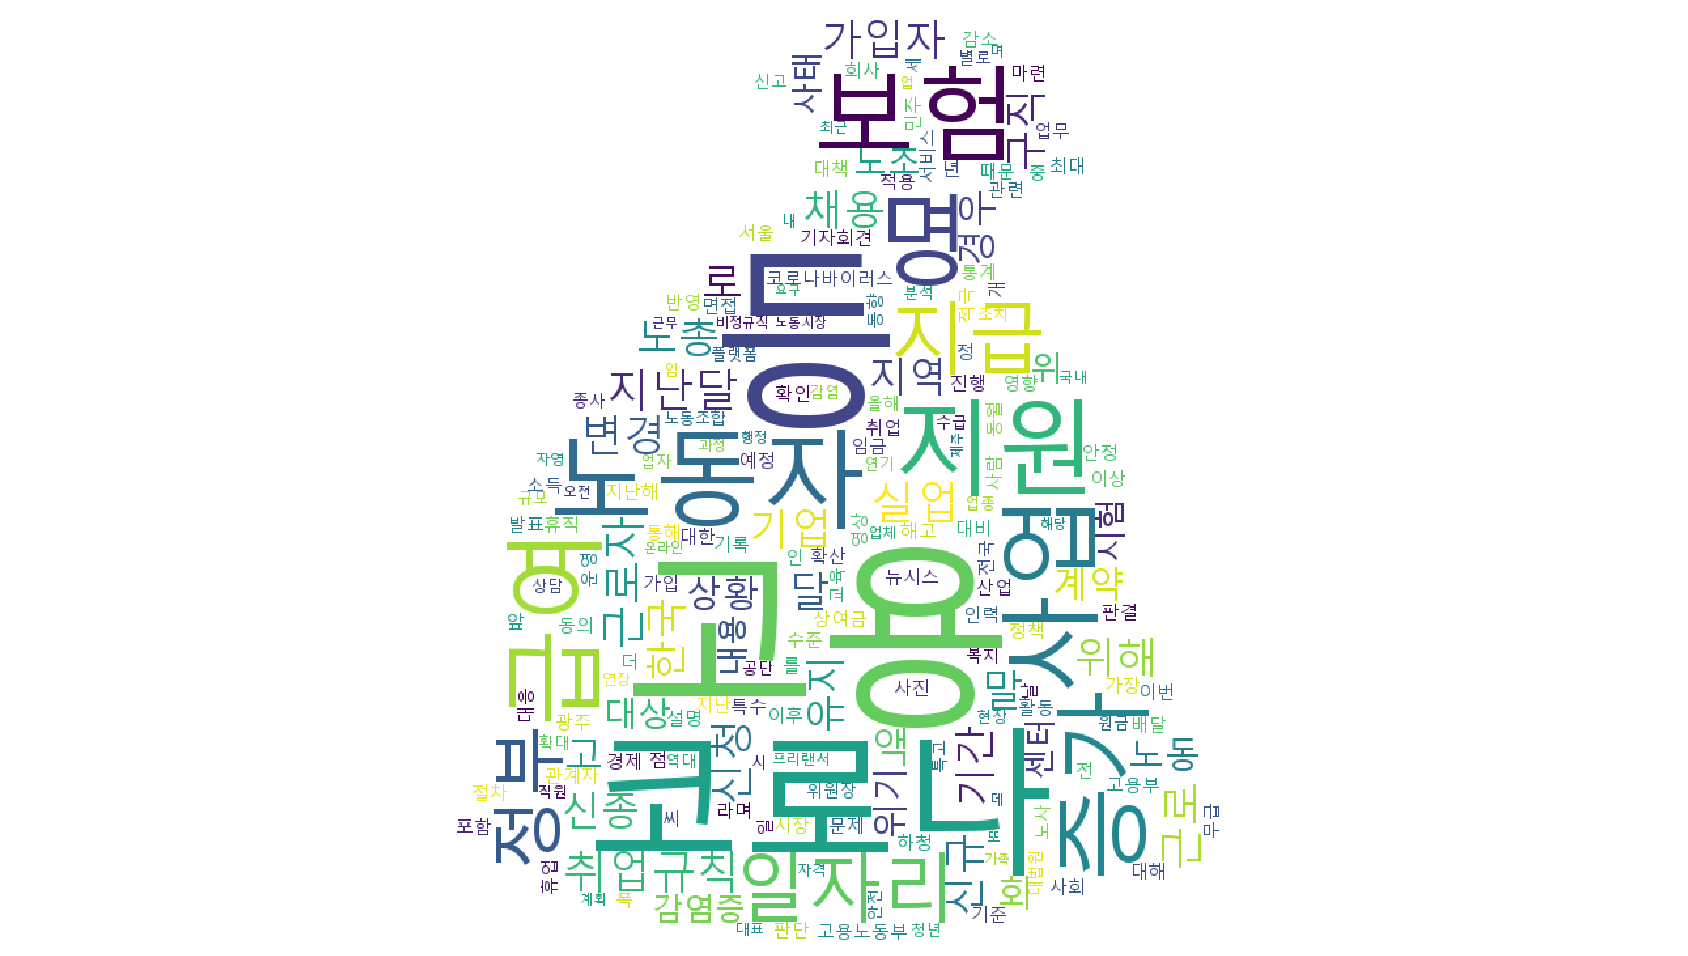

In [68]:
make_cloud("노동", "경제민주화.png",state="no", background_color_n='white', max_font_size_n = 150)

333551
ok


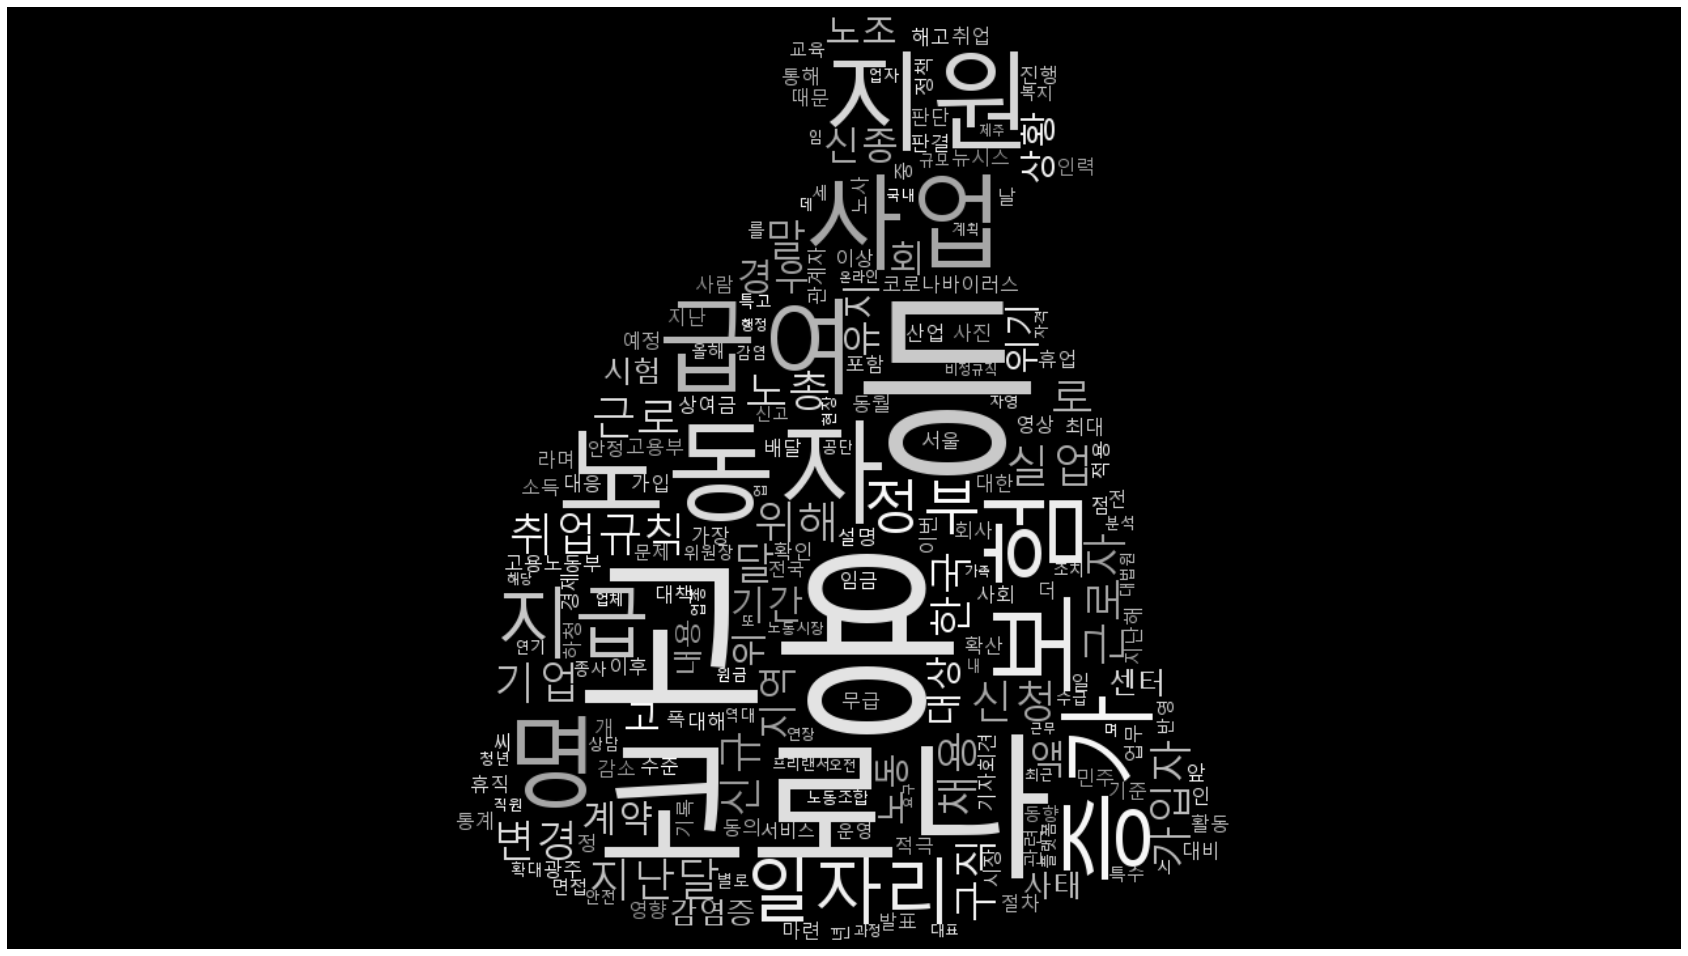

In [69]:
make_cloud("노동", "경제민주화.png",state="grey", background_color_n='black', max_font_size_n = 150)

333551
ok


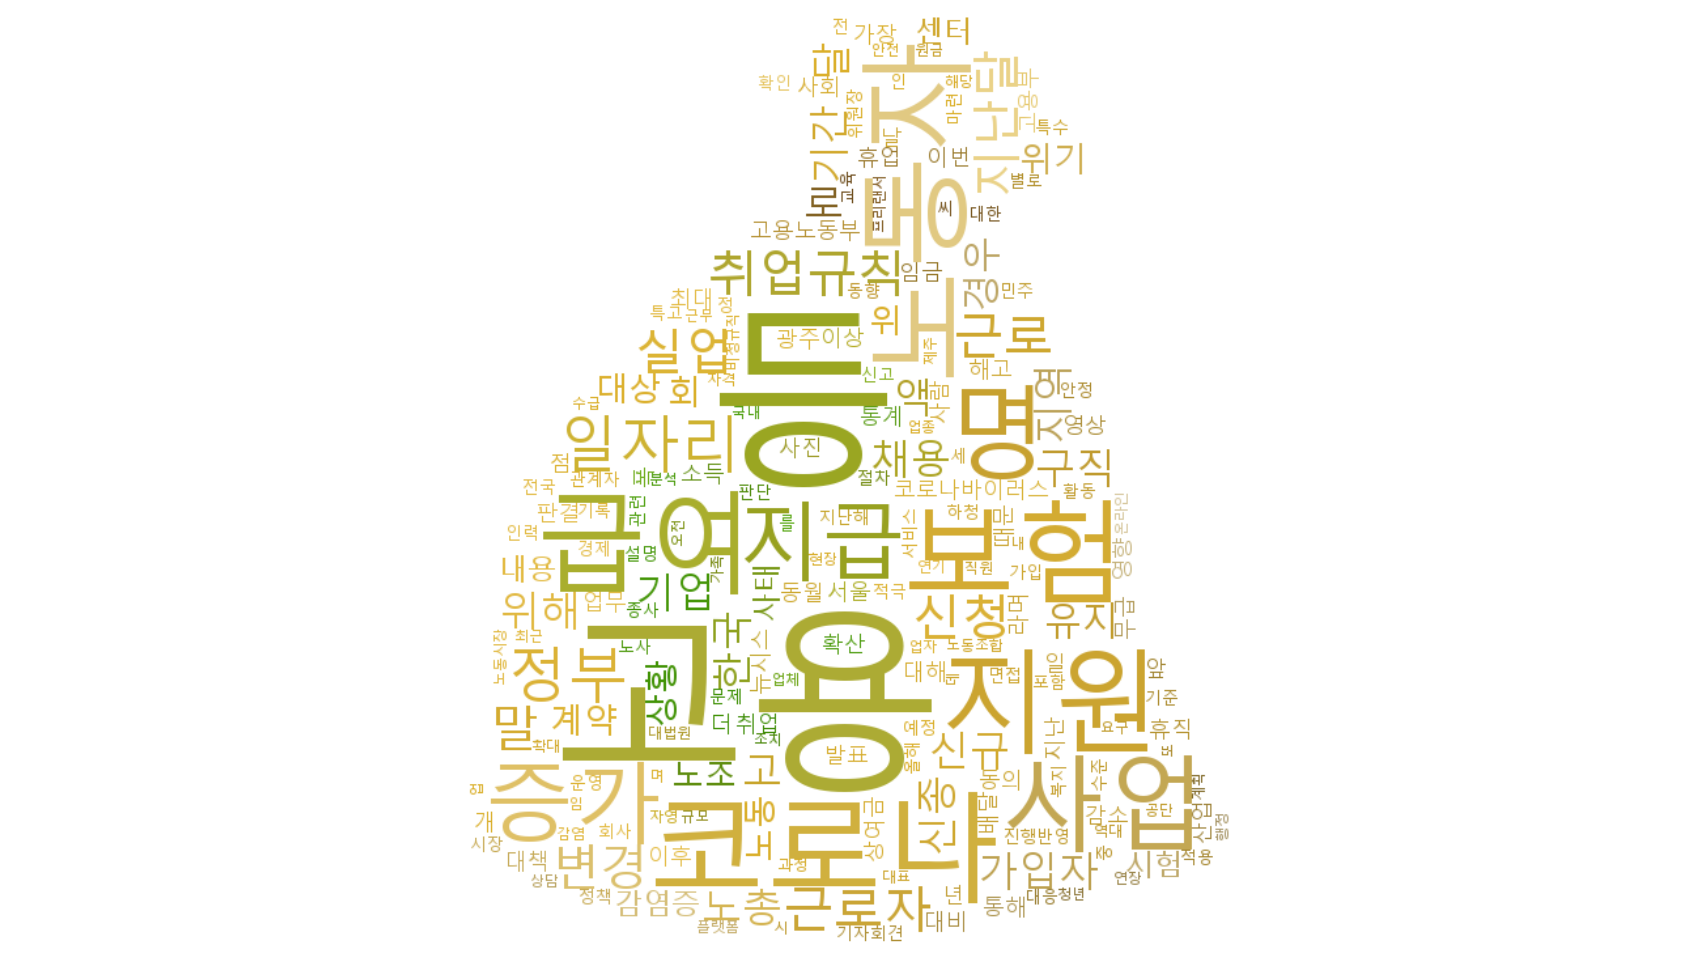

In [70]:
make_cloud("노동", "경제민주화.png",state="img", background_color_n='white', max_font_size_n = 150)

https://pixabay.com/ko/vectors/%EB%8F%88-%EA%B0%80%EB%B0%A9-%ED%98%84%EA%B8%88-%ED%86%B5%ED%99%94-%EC%9E%AC%EC%82%B0-576443/

331526
ok


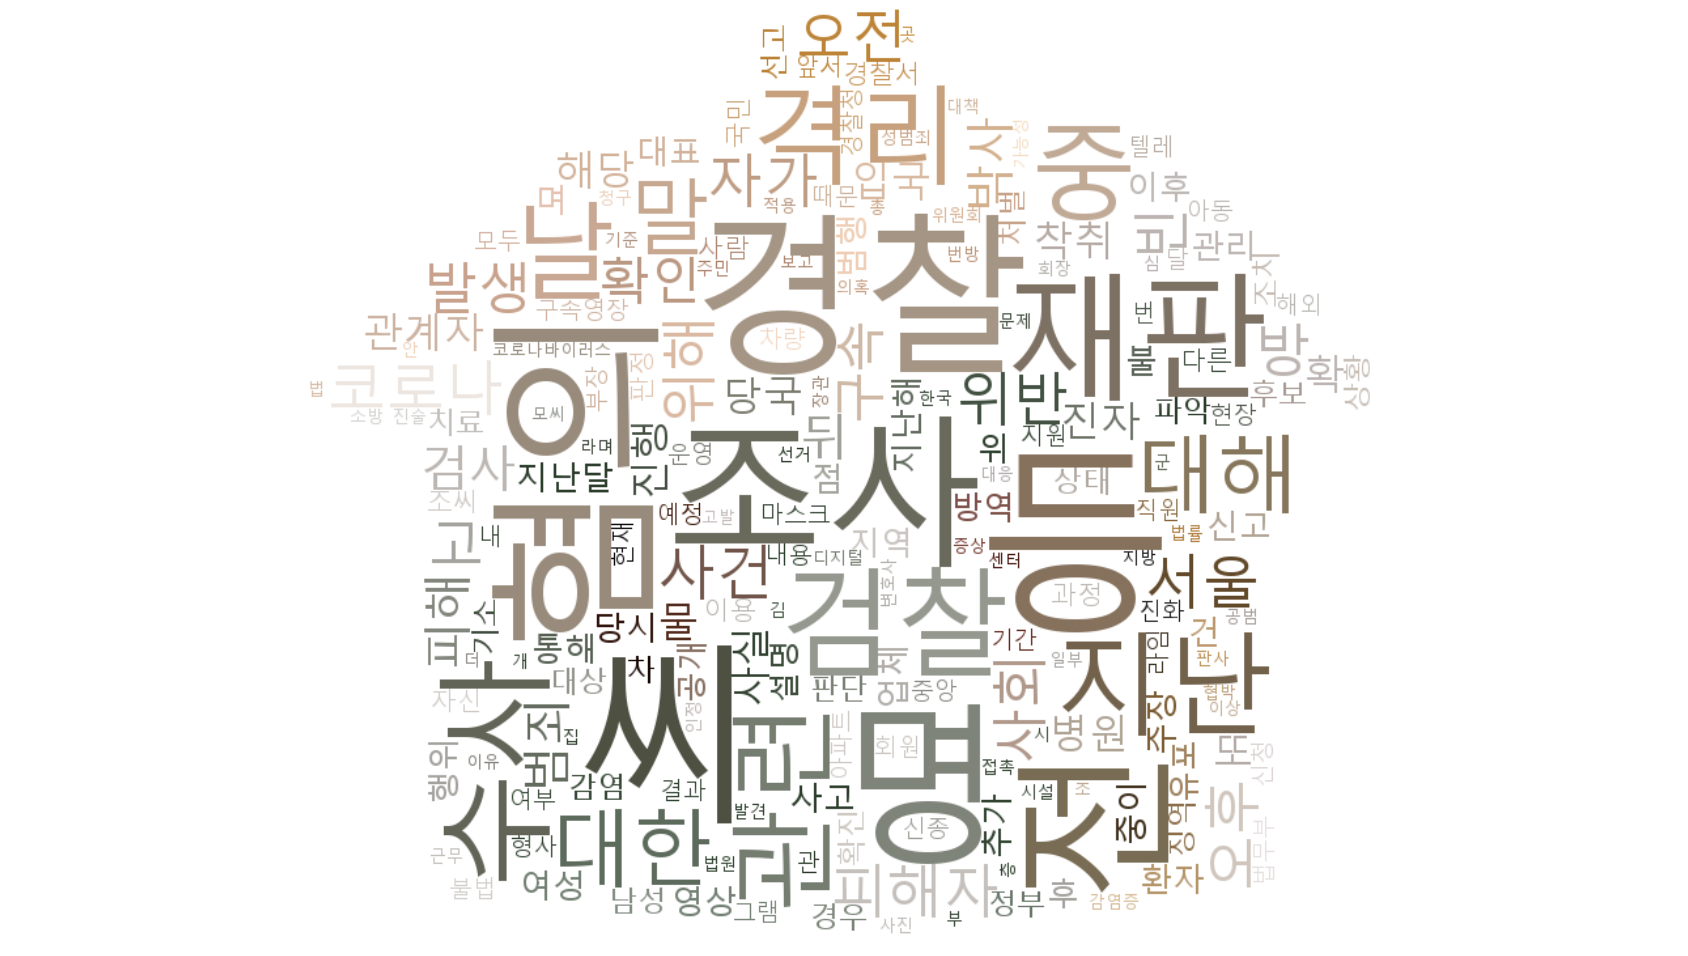

In [71]:
make_cloud("사건사고", "건축.png",state="img", background_color_n='white', max_font_size_n = 150)

https://pixabay.com/ko/vectors/%EC%8B%9C%EA%B3%A8%EC%A7%91-%EC%A7%91-%ED%99%88-%EA%B1%B4%EB%AC%BC-%EC%A1%B0%EA%B8%88-160367/

714550
ok


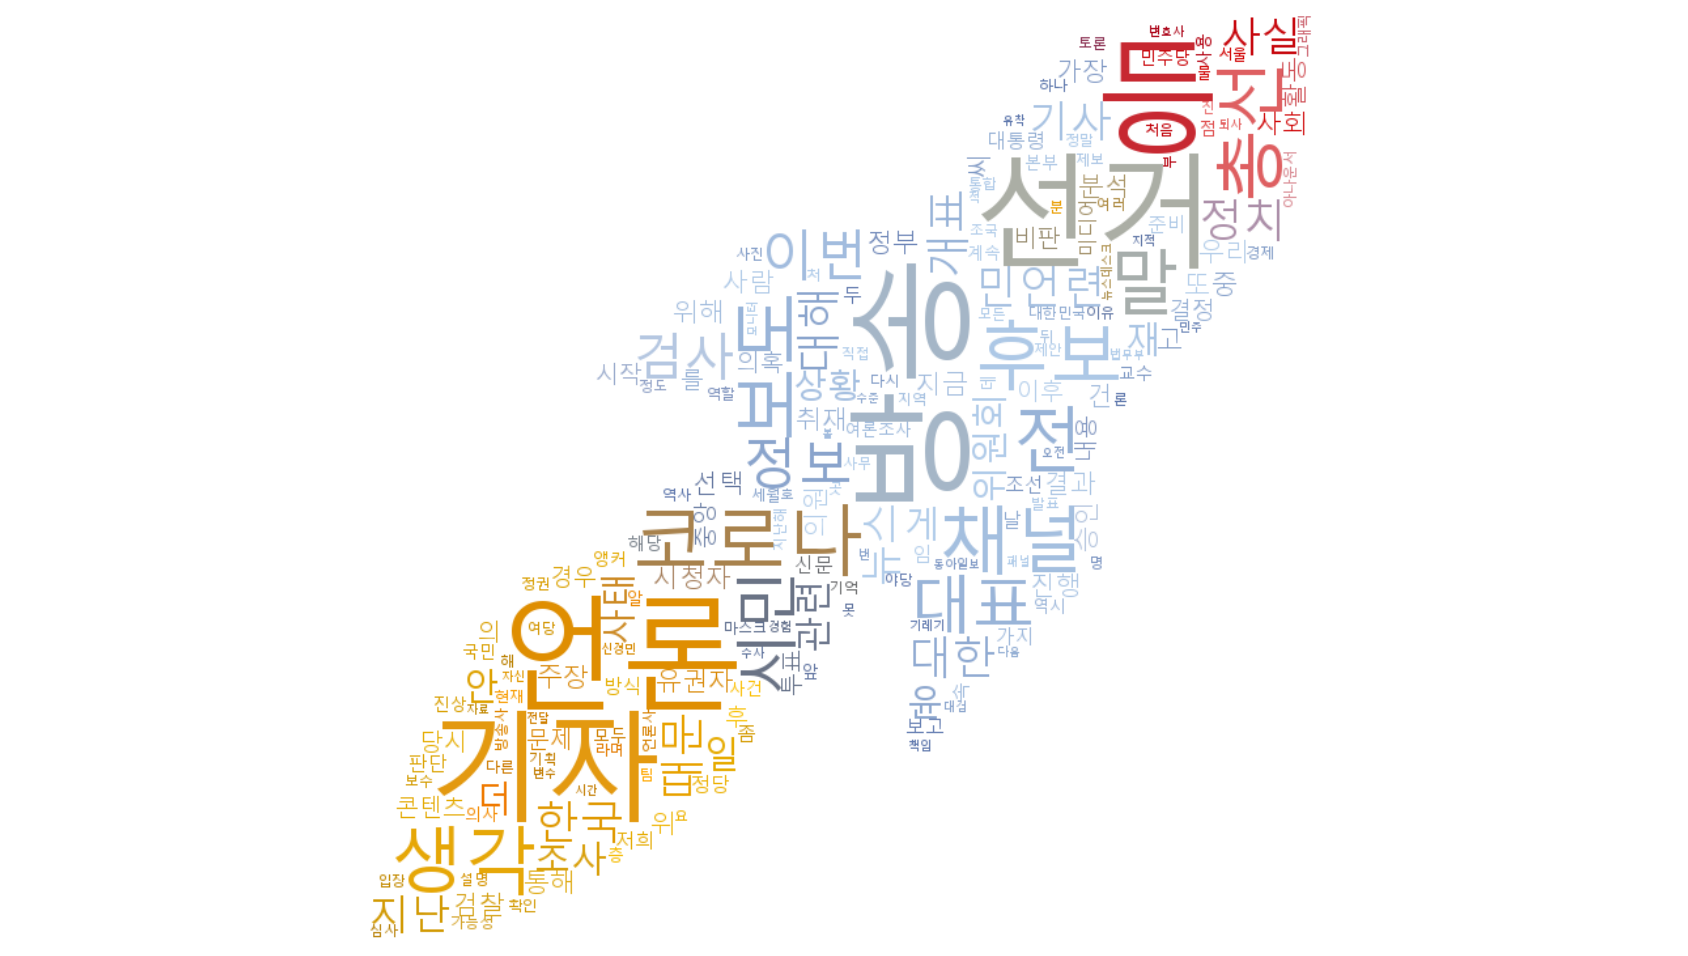

In [72]:
make_cloud("언론", "미래.png",state="img", background_color_n='white', max_font_size_n = 100)

https://pixabay.com/ko/vectors/%EB%A1%9C%EC%BC%93-%EC%9A%B0%EC%A3%BC%EC%84%A0-%EA%B3%B5%EA%B0%84-%EC%8B%9C%EC%9E%91-312767/

209723
ok


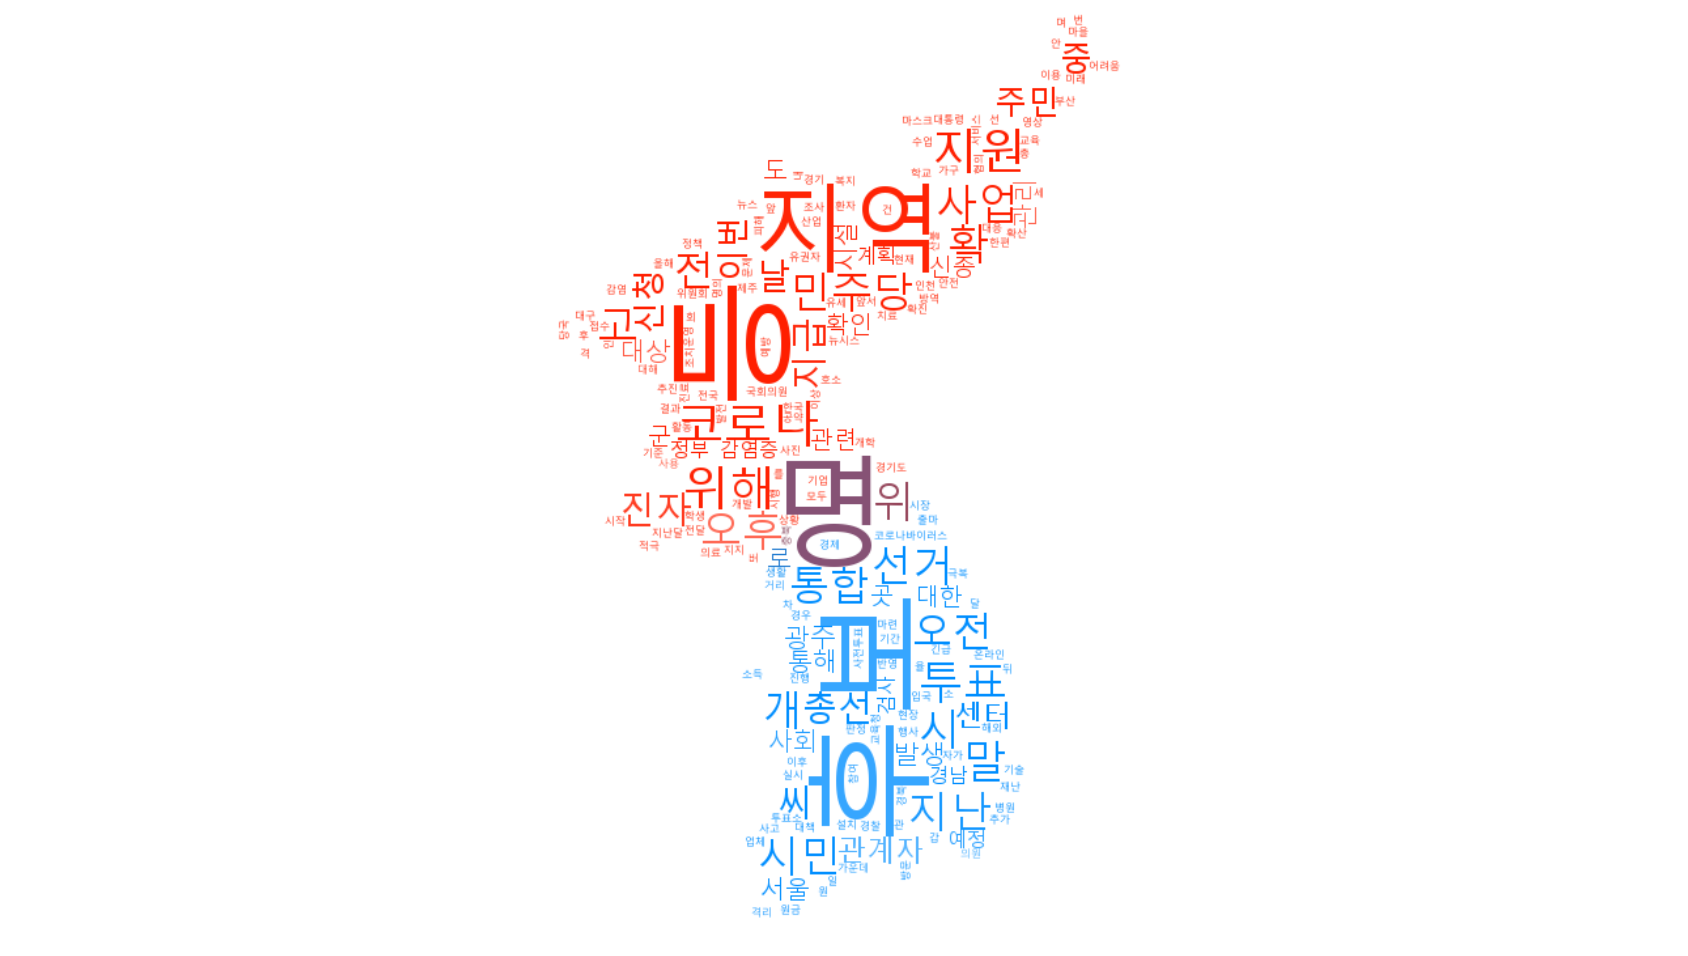

In [73]:
make_cloud("지역", "기타.png",state="img", background_color_n='white', max_font_size_n = 100)

https://pixabay.com/ko/vectors/%EC%95%84%EC%8B%9C%EC%95%84-%EC%95%84%EC%8B%9C%EC%95%84%EC%9D%98-%EB%B8%94%EB%A3%A8-%ED%94%8C%EB%9E%AB-1294398/

294009
ok


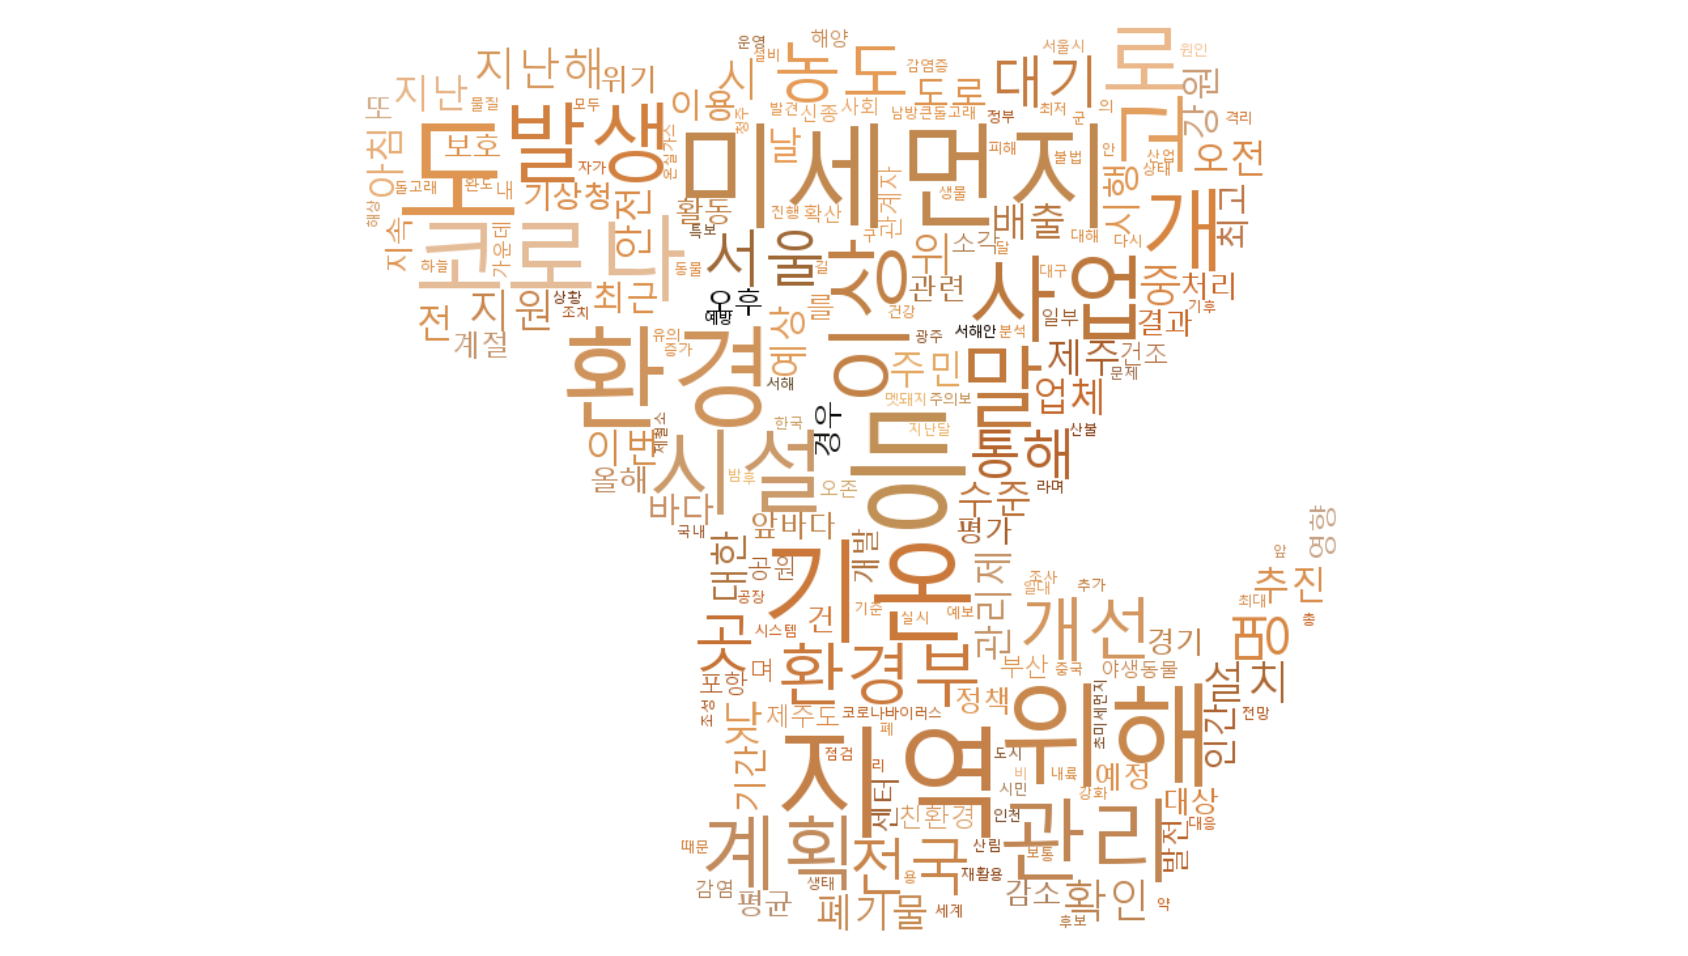

In [74]:
make_cloud("환경", "반려동물.png",state="img", background_color_n='white', max_font_size_n = 100)

714550
ok


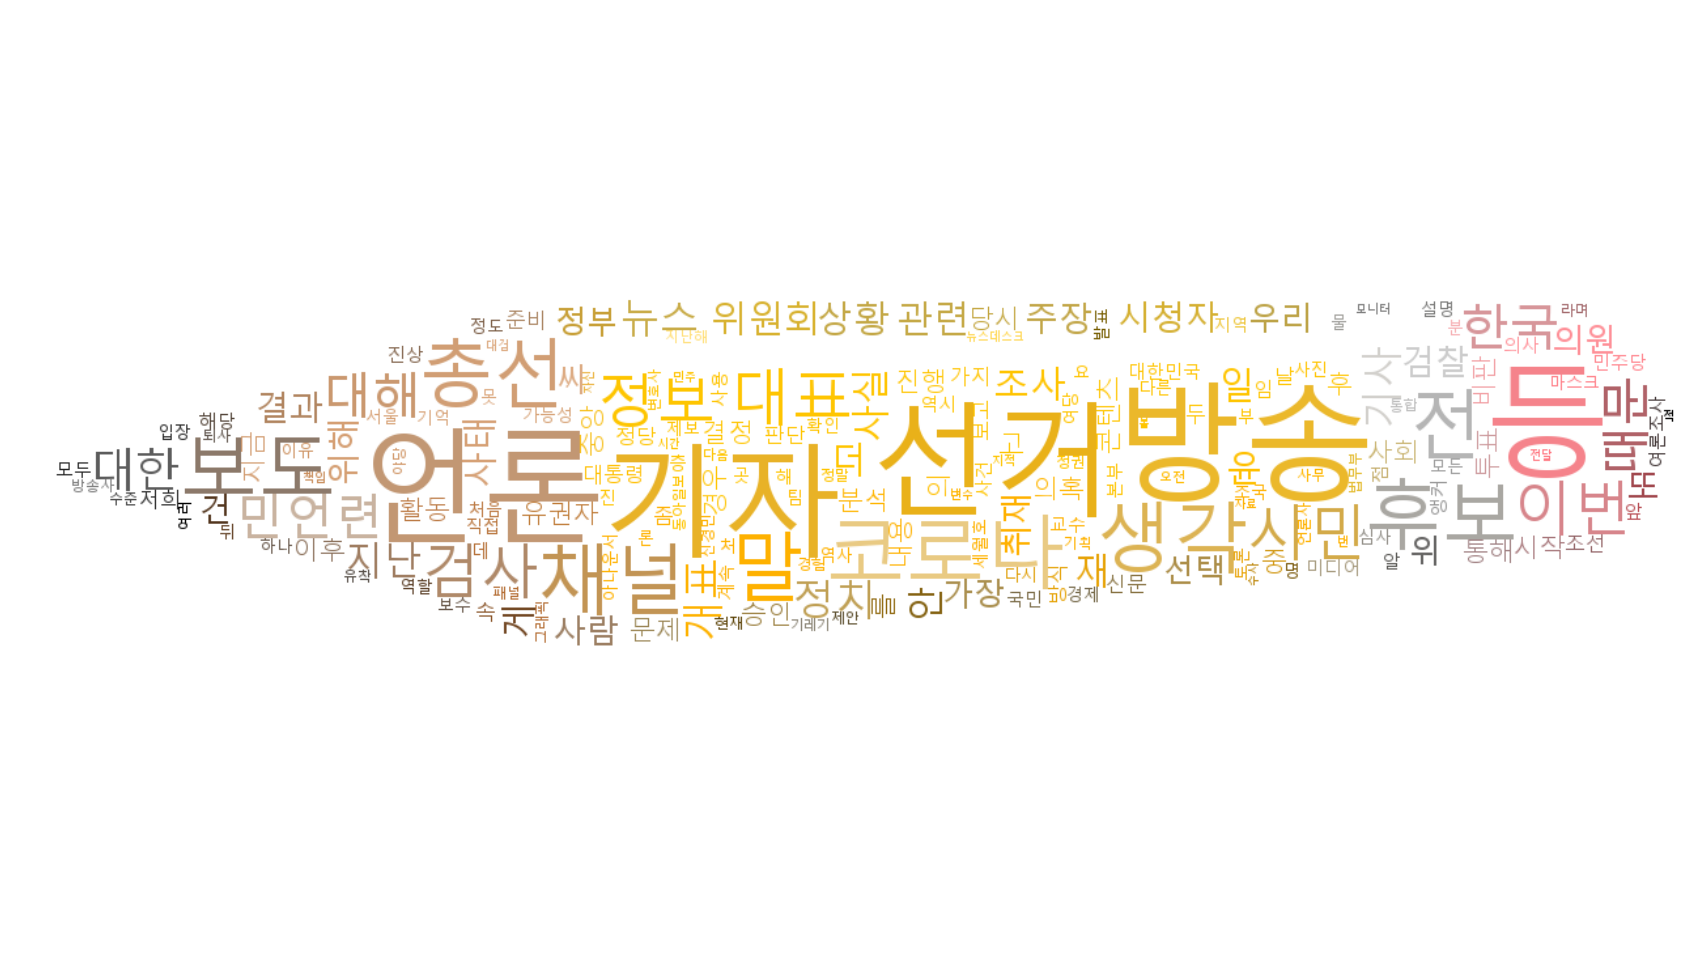

In [75]:
make_cloud("언론", "교육.png",state="img", background_color_n='white', max_font_size_n = 100)

https://pixabay.com/ko/vectors/%ED%95%99%EA%B5%90-%EC%97%B0%ED%95%84-%ED%8E%9C-%EC%93%B0%EB%8B%A4-%EC%8A%A4%EC%BC%80%EC%B9%98-153561/